# 1 Успешность прототипа
Известно что компания конкурент выпустила 1000 прототипов игр, из которых было 5 успешных. Наша компания выпустила 200 прототипов из которых ни один не был успешен.
Какова вероятность что следующий (201й) наш прототип будет успешен? Решите задачу классическим и баесовским подходами.


In [16]:
def classical_approach(competitor_successes, competitor_attempts, our_successes, our_attempts):
    total_successes = competitor_successes + our_successes
    total_attempts = competitor_attempts + our_attempts
    return total_successes / total_attempts

def bayesian_approach(competitor_successes, competitor_attempts, our_successes, our_attempts):

    alpha = 1.0
    beta = 1.0

    alpha += competitor_successes
    beta += competitor_attempts - competitor_successes

    alpha += our_successes
    beta += our_attempts - our_successes


    return alpha / (alpha + beta)

competitor_successes = 5
competitor_attempts = 1000
our_successes = 0
our_attempts = 200

classical_prob = classical_approach(competitor_successes, competitor_attempts, our_successes, our_attempts)
bayesian_prob = bayesian_approach(competitor_successes, competitor_attempts, our_successes, our_attempts)

print(f"Классическая вероятность успеха: {classical_prob*100:.2f} %")
print(f"Байесовская вероятность успеха: {bayesian_prob*100:.2f} %")




Классическая вероятность успеха: 0.42 %
Байесовская вероятность успеха: 0.50 %


**Гипотеза:** Для рассчета вероятностей я предположил, что **вероятность успеха нашей компании идентична с результатами конкурента**.
1. Поэтому для **классического** метода я сделал общую выборку.
2. Для расчет **байесовским** методам я также учел данные обеих компаний, и взял нейтральную начальную точку начав с равномерного априорного распределения и обновляя их с учетом результатов обеих компаний


# 2 Сравнение групп платящих игроков
В мобильной игре около 10% игроков совершает платежи в первый месяц с момента установки игры (база расчета - 500 игроков).
Геймдизайнеры разработали обновление которое по их экспертной оценке должно увеличить процент плательщиков с 10% до 11%. Цель эксперимента - подтвердить или опровергнуть их гипотезу.
1.	Опишите оптимальный по вашему мнению дизайн эксперимента
2.	Рассчитайте длительность эксперимента при условии что каждый день в игру приходит около 100 новых игроков.
3.	Самостоятельно сгенерируйте датасет с около 10% плательщиков (контроль) и рассчитайте 95% HDI / CI.
4.	Сгенерируйте несколько вариантов экспериментальной группы (хуже, лучше, без эффекта), рассчитайте силу эффекта, HDI / CI и ваши выводы для каждого варианта.
5.	Решите задачу 2 разными подходами: frequentist / bayesian


1. ***Опишите оптимальный по вашему мнению дизайн эксперимента***

На основе вводных данных оптимальными дизайнами эксперимента для проверки гипотезы будут A/B тестирование и Когортный анализ. Однако в коретном описанном случае, мы не имеем достаточных данных о пользователей для проведения когортного анализа, соответвественно оптимальным решением будет Сплит тестирование или же A/B тестирование. Мы одновременно даем пользователям две версии игры, версия до обновления и после, все новые игроки будут равномерно распределены на две группы контрольную со старой версией и экспериментальную с новой версией. Гипотеза задана по заданию, статистически значимый результат будет увеличение процента плательщиков на 1%, ошибка первого рода и мощность будут взяты стандартные 5% и 80% соответсвенно, размер выборки определен по формуле и равен 14 313 в каждой группе.
2. ***Рассчитайте длительность эксперимента при условии что каждый день в игру приходит около 100 новых игроков.***

Так как размер выборки 14 313 в каждой группе, и по заданию 100 игроков каждый день, по 50 в каждую группу, длительность теста будет 286 дней.

In [17]:
import random
from scipy.stats import beta
import numpy as np

def generate_data(n_players, payer_proportion):
  payers = [random.random() < payer_proportion for _ in range(n_players)]
  return payers

def calculate_hdi(data):
  n_payers = sum(data)
  a = n_payers + 1
  b = len(data) - n_payers + 1
  hdi_lower, hdi_upper = beta.interval(0.95, a, b)
  mean = sum(data) / len(data)
  effect_size = (mean - payer_proportion) / np.sqrt((mean * (1 - mean)) / n_players)
  return hdi_lower, hdi_upper, effect_size


n_players = 14313
payer_proportion = 0.1

control_dataset = generate_data(n_players, payer_proportion)
hdi_lower, hdi_upper, effect_size = calculate_hdi(control_dataset)

print(f"Контрольная группа")
print(f"Доля плательщиков: {sum(control_dataset) / n_players:.2f}")
print(f"95% HDI: [{hdi_lower:.4f}, {hdi_upper:.4f}]\n")



Контрольная группа
Доля плательщиков: 0.10
95% HDI: [0.0994, 0.1094]



4.	***Сгенерируйте несколько вариантов экспериментальной группы (хуже, лучше, без эффекта), рассчитайте силу эффекта, HDI / CI и ваши выводы для каждого варианта.***

In [18]:
better_proportion = 0.11
worse_proportion = 0.08
same_proportion = 0.10

better_dataset =  generate_data(n_players, better_proportion)
worse_dataset =  generate_data(n_players, worse_proportion)
same_dataset  = generate_data(n_players, same_proportion)

hdi_lower_b, hdi_upper_b, effect_size_b = calculate_hdi (better_dataset)
hdi_lower_w, hdi_upper_w, effect_size_w = calculate_hdi (worse_dataset)
hdi_lower_s, hdi_upper_s, effect_size_s = calculate_hdi (same_dataset)

print(f"Лучшая группа:")
print(f"Доля плательщиков: {sum(better_dataset) / n_players:.2f}")
print(f"95% Highest Density Interval (HDI): [{hdi_lower_b:.4f}, {hdi_upper_b:.4f}]")
print(f"Сила эффекта: {effect_size_b:.2f}\n")

print(f"Худшая группа:")
print(f"Доля плательщиков: {sum(worse_dataset) / n_players:.2f}")
print(f"95% HDI: [{hdi_lower_w:.4f}, {hdi_upper_w:.4f}]")
print(f"Сила эффекта: {effect_size_w:.2f}\n")

print(f"Группа без изменений:")
print(f"Доля плательщиков: {sum(same_dataset) / n_players:.2f}")
print(f"95% HDI: [{hdi_lower_s:.4f}, {hdi_upper_s:.4f}]")
print(f"Сила эффекта: {effect_size_s:.2f}\n")

Лучшая группа:
Доля плательщиков: 0.11
95% Highest Density Interval (HDI): [0.1066, 0.1169]
Сила эффекта: 4.42

Худшая группа:
Доля плательщиков: 0.08
95% HDI: [0.0752, 0.0841]
Сила эффекта: -9.06

Группа без изменений:
Доля плательщиков: 0.10
95% HDI: [0.0995, 0.1095]
Сила эффекта: 1.71



1. Лучшая группа показала значительное улучшение доли плательщиков, с силой эффекта в 3.74%, что даже превышает ожидаемые результаты. И интервал достоверности так же показывает, что измениние значительное.
2. Худшая группа же как и ожидалось показала значительное уменьшение доли плательщиков, сила эффекта и интревал доказывают значительность изменения.
3. Нейтральна группа показала небольшое уменьшие доли плательщиков, однако значение небольшое и интервал очень близок к изначальному интервалу. Хоть и ожидалось, что это группа покажет нейтральный результат было незначительное понижение, это может быть связано со статистическими колебаниями.

***5.	Решите задачу 2 разными подходами: frequentist / bayesian***

1.	Frequentist подход

In [9]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest


control_successes = np.sum(control_dataset)
control_n = len(control_dataset)

def run_z_test(group_data, group_name):
    group_successes = np.sum(group_data)
    group_n = len(group_data)

    z_stat, p_value = proportions_ztest([  group_successes , control_successes], [control_n, group_n])
    if z_stat > 0 and p_value < 0.05:
      print("Нyлевая гипотеза опровергнyта, положительное статистическое изменение ")
    else:
      print("Невозможно отвергнуть нулевую гипотезу")
    print(f"{group_name} group: z-statistic = {z_stat:.3f}, p-value = {p_value:.6f}\n")
    return group_name, z_stat, p_value


results_better = run_z_test(better_dataset, "Better")

results_worse = run_z_test(worse_dataset, "Worse")

results_same = run_z_test(same_dataset, "Same")



Нyлевая гипотеза опровергнyта, положительное статистическое изменение 
Better group: z-statistic = 3.583, p-value = 0.000339

Невозможно отвергнуть нулевую гипотезу
Worse group: z-statistic = -4.534, p-value = 0.000006

Невозможно отвергнуть нулевую гипотезу
Same group: z-statistic = 0.737, p-value = 0.460988



Результаты **Frequentist подхода**, полностью опрадывают ожидаемые результаты. Данный подход использует **z-tеst **для сравнения средних значений метрики между контрольной и экспериментальной группы. Положительное **значение z** говорит о том что среднее значение метрики в первой группе (в нашем случае это экспериметальная) больше, чем в контрольной группе, **p-valuе** показывает ниже 0.05  показывает, что результат статистически значимый. Для лучшей и худшей группы результаты полностью подходят под ожидания, результат нейтральной группы показывает небольшое изменение доли плательщиков в экспериментальной группе, однако размер p-valuе показывает, что изменение статистически не значимое.

2. Bayesian подход

In [10]:
import numpy as np

def bayesian_update(data):
    successes = np.sum(data)
    failures = len(data) - successes

    a_prior = 1
    b_prior = 1


    a_post = a_prior + successes
    b_post = b_prior + failures

    posterior_samples = np.random.beta(a_post, b_post, size= 14313)


    lower_bound, upper_bound = np.percentile(posterior_samples, [2.5, 97.5])

    return {
        "mean": np.mean(posterior_samples),
        "95% CI": (lower_bound, upper_bound),
        "samples": posterior_samples
    }


def interpret_results(control, experiment, description):

    mean_diff = experiment['mean'] - control['mean']

    ci_overlap = control['95% CI'][1] > experiment['95% CI'][0] and control['95% CI'][0] < experiment['95% CI'][1]

    interpretation = f"Группа '{description}' имеет среднюю долю плательщиков {experiment['mean']*100:.2f} %. "
    interpretation += f" HDI интервал: от {experiment['95% CI'][0]*100:.2f}% до {experiment['95% CI'][1]*100:.2f}%. "

    if mean_diff > 0 and not ci_overlap:
        interpretation += "Значительное положительное улучшение по сравнению с контрольной группой."
    elif mean_diff < 0 and not ci_overlap:
        interpretation += "Значительное ухудшение по сравнению с контрольной группой."
    else:
        interpretation += "Нет значительного изменения по сравнению с контрольной группой."

    return interpretation


bayesian_control = bayesian_update(control_dataset)


bayesian_better = bayesian_update(better_dataset)
bayesian_worse = bayesian_update(worse_dataset)
bayesian_same = bayesian_update(same_dataset)


Better = interpret_results(bayesian_control, bayesian_better, "Лучше")
Worse = interpret_results(bayesian_control, bayesian_worse, "Хуже")
Same = interpret_results(bayesian_control, bayesian_same, "Без изменений")


(Better, Worse, Same)



("Группа 'Лучше' имеет среднюю долю плательщиков 10.91 %.  HDI интервал: от 10.39% до 11.42%. Значительное положительное улучшение по сравнению с контрольной группой.",
 "Группа 'Хуже' имеет среднюю долю плательщиков 8.10 %.  HDI интервал: от 7.67% до 8.56%. Значительное ухудшение по сравнению с контрольной группой.",
 "Группа 'Без изменений' имеет среднюю долю плательщиков 9.88 %.  HDI интервал: от 9.41% до 10.37%. Нет значительного изменения по сравнению с контрольной группой.")

# 3 Предсказание оттока
В мобильной игре, после установки и запуска игры начинается туториал - игрок проходит обучение игре, которое состоит из нескольких последовательных шагов.
Данные представляют собой набор строк - уникальный id игрока, datetime и номер шага туториала который пройден игроком.
Геймдизайнеры выдвинули гипотезу - если мы с высокой вероятностью сможем предсказать шаг на котором игрок уйдет из игры заранее, то запустив альтернативное продолжение туториала с этого шага мы избежим оттока и увеличим прохождение туториала.
1.	Как бы вы решали задачу предсказания отвала игрока?
2.	Как оценить качество полученной модели? Опишите методы которые знаете и какой считаете оптимальным и почему.
3.	Предположим что вы разработали модель которая с достаточной вероятностью предсказывает отвал. Опишите дизайн эксперимента и методологию по проверке гипотезы геймдизайнеров


1. Я бы разделил ответ на **два возможных подходов** для решения этой проблемы.
  **Первый способ** является аналитическим, по аналогии с анализом воронок, мы можем отслеживать количество игроков на каждом из шагов туториала, тем самым определяя процент отвала игроков после каждого из шагов, так же зная медианное время проведенное игроком на каждом шаге, мы сможем провести анализ и выявим проблемный этап туториала. Этот подход не является полноценно достоверным, однако требует значительно меньше ресурсов.
  **Второй способ** это обучение модели машинного обучения, для решения этой задачи я бы использовал последовательные модели, а именно виды рекуретных нейронных сетей, как **LSTM**. Несмотря на ресурсную затратность обучения такой модели, этот тип моделей учитывают временные зависимости и последовательность шагов, которые идеально подходят под наш случай.
2. Для оценки качества получнной модели можно использовать **классические методы валидации**, используя исторические данные, которые не были использованы при тренировке и тесте, в нашем случае где важна последовательность действий пользователя, так же использовать классические метрики оценки, как **F1score** для оценки точности и полноты результатов.
3. Для проверки гипотезы геймдизайнеров можно использовать **A/B тестирование**, разделяя всех игроков на две группы, контрольная группа продолжает использовать обычную версию, экспериментальная группа использует адаптивный туториал на основе разработанной модели. Игроки должны случайным образом равномерно быть распределены по группам. Длительность теста можно рассчитать по формуле в зависимости от потока игроков, ожидаемого прироста, мощности. В ходе экспиримента должны быть собранные данные по **метрикам** для анализа: процент игроков завершивших весь туториал, время потраченное на это, количество игровых ссесий для завершения туториала, время на каждом из шагов, шаг на котором игрок отваливается. После окончания эксперимента можно будет использовать **t-tеst** для сравнения средних значений метрик между контрольной и экспериментальной группы. Интерпритации данных полученных с анализа сможет потвердить или опровергнуть гипотезу

# 4 Эффективность рекламных кампаний
Отдел маркетинга оперирует некоторым множеством рекламных кампаний. Первая часть оперирования состоит из запуска тестовых рекламных кампаний, у которых есть требования по KPI при достижении которых тест считается успешным.
Успешные тесты переходят в разряд постоянных кампаний и вторая часть оперирования состоит из мониторинга постоянных кампаний - управление бюджетом кампании (COST) и мониторинг ее доходов (REVENUE), а так же соотношением доходов к расходам.
Главный KPI для постоянных рекламных кампаний - ROAS на 60й день, т.е. какой процент от расходов кампания возвращает на 60й день.
Для выполнения задачи необходимо использовать тестовый датасет (2 таблицы по расходам и доходам).
1.	Отдел маркетинга руководствуется гипотезой - чем больший COST расходуется на кампанию тем ниже ROAS 60го дня (рост CPI при увеличении объёма закупки при сохранении того же LTV 60го дня). На основании данных подтвердите или опровергните эту гипотезу. Исходите из того что мы точно знаем что CPI зависит от объема нелинейно, вопрос в том как эту зависимость описать и учесть во 2м вопросе.
2.	По каждой рекламной кампании рассчитайте суточный рекламный бюджет который максимизирует абсолютную маркетинговую прибыль рекламной кампании (REVENUE 60 дня минус COST).
3.	Исходя из пункта 2 по каждой рекламной кампании дайте ваше заключение о том насколько нужно увеличить / уменьшить ее суточный бюджет либо вообще остановить.
4.	Решите проблему рекламных кампаний по которым еще нет полных 60 дней. Объясните почему ваше решение оптимально


In [31]:
import sqlite3


conn = sqlite3.connect('testcase.db')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

tables


[('source_comparison',), ('costs',), ('revenue',)]

In [32]:

cursor.execute("PRAGMA table_info(costs);")
schema_costs = cursor.fetchall()
cursor.execute("PRAGMA table_info(revenue);")
schema_revenue = cursor.fetchall()

schema_costs, schema_revenue


([(0, 'Install_Dates', 'TEXT', 0, None, 0),
  (1, 'campaign_id', 'INTEGER', 0, None, 0),
  (2, 'Country', 'TEXT', 0, None, 0),
  (3, 'installs', 'REAL', 0, None, 0),
  (4, 'spends', 'REAL', 0, None, 0)],
 [(0, 'Install_Dates', 'TEXT', 0, None, 0),
  (1, 'campaign_id', 'INTEGER', 0, None, 0),
  (2, 'Country', 'TEXT', 0, None, 0),
  (3, '1d_LTV', 'REAL', 0, None, 0),
  (4, '3d_LTV', 'REAL', 0, None, 0),
  (5, '7d_LTV', 'REAL', 0, None, 0),
  (6, '14d_LTV', 'REAL', 0, None, 0),
  (7, '30d_LTV', 'REAL', 0, None, 0),
  (8, '60d_LTV', 'REAL', 0, None, 0)])

In [33]:
import pandas as pd

query_costs = "SELECT * FROM costs;"
costs_data = pd.read_sql_query(query_costs, conn)

query_revenue = "SELECT * FROM revenue;"
revenue_data = pd.read_sql_query(query_revenue, conn)


In [34]:

from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm


merged_data = pd.merge(costs_data, revenue_data, on=['Install_Dates', 'campaign_id', 'Country'])
merged_data['ROAS_60d'] = ((merged_data['60d_LTV']) / merged_data['spends'])*100

filtered_data = merged_data[(merged_data['spends'] > 0) & (merged_data['60d_LTV'] > 0)]

X = filtered_data[['spends']]
y = filtered_data['ROAS_60d']

X = sm.add_constant(X)
model_1 = sm.OLS(y, X).fit()

print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:               ROAS_60d   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.781
Date:                Wed, 22 May 2024   Prob (F-statistic):             0.0162
Time:                        14:34:27   Log-Likelihood:                -31721.
No. Observations:                4035   AIC:                         6.345e+04
Df Residuals:                    4033   BIC:                         6.346e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        203.4109     10.526     19.324      0.0

На основе анализа данных мы модели мы видим, что коэфициент равен -0,441, что говорит о верности выдвинутой теории геймдизайнеров, чем больший COST расходуется на кампанию тем ниже ROAS 60го дня, однако значение R^2 говорит о том, что эта модель слабо описывает связь между двумя переменными. Я так же пробовал другие виды регрессий и рассчета взаимосвязи между переменными однако значение R^2 везде оставалось довольно низким, что может говорить о том, что для оценки связи между этими переменными мы должны учитывать дополнительные факторы тем самым дополнив гипотезу.

In [35]:

def calculate_profit(cost, intercept, coef):
    roas = intercept + coef * cost
    revenue_60d = (roas / 100) * cost
    profit = revenue_60d - cost
    return profit

unique_campaigns = filtered_data['campaign_id'].unique()

results = []
n = 1
for campaign in unique_campaigns:
    campaign_data = filtered_data[filtered_data['campaign_id'] == campaign]

    X_campaign = campaign_data[['spends']]
    y_campaign = campaign_data['ROAS_60d']

    X_campaign = sm.add_constant(X_campaign)
    model_campaign = sm.OLS(y_campaign, X_campaign).fit()

    intercept_campaign = model_campaign.params[0]
    coef_campaign = model_campaign.params[1] if len(model_campaign.params) > 1 else 0


    min_cost = campaign_data['spends'].min()
    max_cost = campaign_data['spends'].max()


    costs = np.linspace(min_cost, max_cost, 100)
    profits = [calculate_profit(cost, intercept_campaign, coef_campaign) for cost in costs]

    max_profit = max(profits)
    optimal_cost = costs[profits.index(max_profit)]

    results.append((campaign, optimal_cost, max_profit))


results_df = pd.DataFrame(results, columns=['campaign_id',  'optimal_daily_budget', 'max_profit'])

print(results_df)


     campaign_id  optimal_daily_budget  max_profit
0          90570              9.989192    4.297024
1          19115            381.960000  112.966467
2         790424             43.190000   13.682117
3         788583             43.800000   14.674237
4         789470             24.800000    7.813091
..           ...                   ...         ...
188       161245              0.240000   -0.208873
189        91343              5.450000   -5.237183
190       789079              0.100000   -0.081380
191       789069              0.380000   -0.361437
192        95839              2.540000   -2.381477

[193 rows x 3 columns]


In [36]:
profit_threshold = 0
average_spends = filtered_data.groupby('campaign_id')['spends'].mean()
merged_new = pd.merge(results_df, average_spends, on=[ 'campaign_id'])

def make_decision(row):
    current_spend = row['spends']
    optimal_spend = row['optimal_daily_budget']
    max_profit = row['max_profit']

    if max_profit <= profit_threshold:
        return "Stop"
    elif optimal_spend > current_spend:
        return "Increase Budget"
    elif optimal_spend < current_spend:
        return "Decrease Budget"
    else:
        return "Maintain Budget"


merged_new['decision'] = merged_new.apply(make_decision, axis=1)


print(merged_new[['campaign_id', 'spends', 'optimal_daily_budget', 'max_profit', 'decision']])


     campaign_id     spends  optimal_daily_budget  max_profit         decision
0          90570  16.467857              9.989192    4.297024  Decrease Budget
1          19115  19.946333            381.960000  112.966467  Increase Budget
2         790424  22.576667             43.190000   13.682117  Increase Budget
3         788583  16.242000             43.800000   14.674237  Increase Budget
4         789470  14.380000             24.800000    7.813091  Increase Budget
..           ...        ...                   ...         ...              ...
188       161245  16.950000              0.240000   -0.208873             Stop
189        91343   5.450000              5.450000   -5.237183             Stop
190       789079   0.100000              0.100000   -0.081380             Stop
191       789069   0.380000              0.380000   -0.361437             Stop
192        95839   2.540000              2.540000   -2.381477             Stop

[193 rows x 5 columns]


# 5 Связь рекламного траффика и органического
Приток новых игроков делится на 2 основных источника - рекламный и органический. Отдел маркетинг выдвигает гипотезу о связи рекламного и органического траффика: когда маркетологи привлекают больше рекламного траффика, растет и органический.
Для выполнения задачи необходимо использовать тестовый датасет (таблица source_comparison).
1.	Используя Causal Impact Analysis подтвердите или опровергните гипотезу маркетологов. Если вы ее опровергаете, то сформулируйте гипотезу которая кажется вам наиболее вероятной и проверьте ее
2.	Количественно рассчитайте вероятность что гипотеза маркетологов (или ваша) верна


In [37]:
import sqlite3
conn = sqlite3.connect('testcase.db')


tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = conn.execute(tables_query).fetchall()
tables


[('source_comparison',), ('costs',), ('revenue',)]

In [38]:

source_comparison_query = "SELECT * FROM source_comparison;"
source_comparison_data = conn.execute(source_comparison_query).fetchall()

cursor = conn.execute(source_comparison_query)
columns = [description[0] for description in cursor.description]
columns


['Install_Dates', 'source_type', 'Country', 'installs']

In [39]:
import pandas as pd


df = pd.DataFrame(source_comparison_data, columns=columns)

df['Install_Dates'] = pd.to_datetime(df['Install_Dates'])


data = df.groupby(['Install_Dates', 'source_type']).agg({'installs': 'sum'}).unstack()


data.columns = ['Organic', 'Paid']

data

,Organic,Paid
Install_Dates,,
2020-03-18,8961.0,7359.0
2020-03-19,8457.0,6739.0
2020-03-20,8819.0,7254.0
2020-03-21,4485.0,9552.0
2020-03-22,5105.0,14804.0
...,...,...
2020-05-14,3324.0,8761.0
2020-05-15,3207.0,7031.0
2020-05-16,3732.0,7579.0


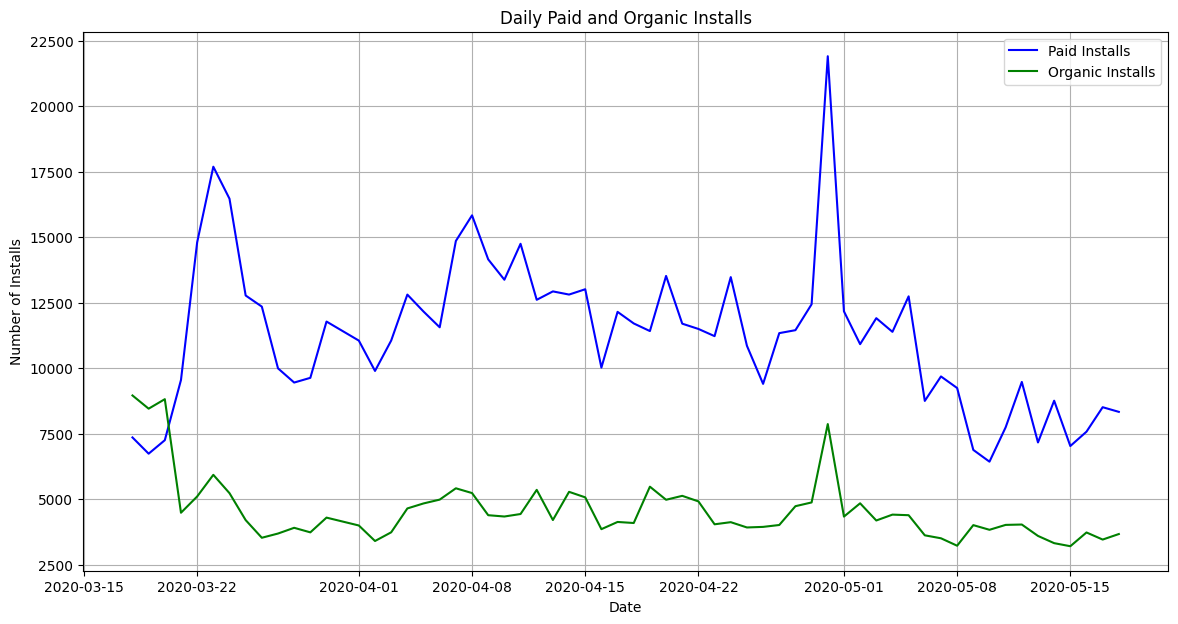

In [40]:
import matplotlib.pyplot as plt



plt.figure(figsize=(14, 7))
plt.plot( data['Paid'], label='Paid Installs', color='blue')
plt.plot( data['Organic'], label='Organic Installs', color='green')
plt.title('Daily Paid and Organic Installs')
plt.xlabel('Date')
plt.ylabel('Number of Installs')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
!pip install pycausalimpact

In [41]:
from causalimpact import CausalImpact


data_for_impact = data[['Organic','Paid']]
pre_period = ['2020-04-01', '2020-05-10']
post_period = ['2020-05-11', '2020-05-18']

impact = CausalImpact(data_for_impact, pre_period, post_period)

print(impact.summary('report'))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWar

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 3631.5. In the absence of an
intervention, we would have expected an average response of 3546.51.
The 95% interval of this counterfactual prediction is [3179.96, 3937.36].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 84.99 with a 95% interval of
[-305.86, 451.54]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 29052.0.
Had the intervention not taken place, we would have expected
a sum of 28372.09. The 95% interval of this prediction is [25439.69, 31498.85].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed

In [42]:
from causalimpact import CausalImpact


data_for_impact = data[['Organic','Paid']]
pre_period = ['2020-03-18', '2020-05-10']
post_period = ['2020-05-11', '2020-05-18']

impact = CausalImpact(data_for_impact, pre_period, post_period)

print(impact.summary('report'))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836:

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 3631.5. In the absence of an
intervention, we would have expected an average response of 4523.07.
The 95% interval of this counterfactual prediction is [3584.15, 5481.65].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -891.57 with a 95% interval of
[-1850.15, 47.35]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 29052.0.
Had the intervention not taken place, we would have expected
a sum of 36184.58. The 95% interval of this prediction is [28673.22, 43853.2].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showe

Я провел **два анализа** с различным интервала пре и пост периода, для сравнения результата, из за резких изменений в конце марта. В **первом тесте** для пре период начинается с апреля месяца отчет показывает, что изначальная теория выдвинутая о связи рекламного и органического траффика: когда маркетологи привлекают больше рекламного траффика, растет и органический - является верной с приростом в 2.4%. Однако этот результат **статистические не значителен**. Во **втором варианте**, где пре период начинается с самого первой даты 18 марта, показывает обратную тенденцию и результат **статистически значителен**. Такие результаты могут говорить о том, что на эту связь влияет и другие факторы. Поэтому **новая гипотеза** звучит так, Связь рекламного и органического трафика в большей степени зависит от страны, которая **потверждена снизу.**

In [43]:
import sqlite3
import pandas as pd


conn = sqlite3.connect('testcase.db')
query = "SELECT * FROM source_comparison;"
df_n = pd.read_sql(query, conn)
df_n['Install_Dates'] = pd.to_datetime(df_n['Install_Dates'])
print(df_n)


      Install_Dates source_type Country  installs
0        2020-05-18        Paid      PY       4.0
1        2020-04-14        Paid      FR      35.0
2        2020-04-30        Paid      JP      25.0
3        2020-03-20        Paid      DE      11.0
4        2020-04-30        Paid      IT       8.0
...             ...         ...     ...       ...
18601    2020-04-14        Paid      IQ       1.0
18602    2020-03-18     Organic      MM     130.0
18603    2020-05-06        Paid      CI       2.0
18604    2020-04-20     Organic      HT       1.0
18605    2020-04-14     Organic      SO       4.0

[18606 rows x 4 columns]


In [44]:
correlations = {}
for country in df_n['Country'].unique():
    filtered_data = df_n[df_n['Country'] == country]
    if filtered_data['source_type'].nunique() > 1:
        country_traffic = filtered_data.pivot_table(index='Install_Dates', columns='source_type', values='installs', aggfunc='sum')
        correlation = country_traffic.corr().loc['Paid', 'Organic']
        correlations[country] = correlation

correlations


{'PY': 0.6615165051775821,
 'FR': 0.573454958546898,
 'JP': 0.28184769427961054,
 'DE': 0.2223510258902258,
 'IT': 0.5894354348548684,
 'KE': 0.3333333333333333,
 'NZ': 0.0079027865088686,
 'EG': 0.09441410325218971,
 'UA': 0.3384436154275192,
 'IR': 0.19044215058568914,
 'CZ': 0.6264807809189527,
 'PT': 0.7130447689652596,
 'VE': -0.008733376427063422,
 'ID': 0.2271540684967117,
 'BY': 0.8053283653102349,
 'RO': 0.4991256856104117,
 'IE': 0.2594124993916956,
 'PG': nan,
 'KZ': 0.6849252334569452,
 'NC': nan,
 'PA': -0.27604764625501743,
 'DZ': 0.41286251621645886,
 'AR': 0.4420109666902476,
 'UY': -0.07930294188883569,
 'TZ': nan,
 'AE': 0.01660899967704581,
 'BA': -0.29688299357391473,
 'BG': 0.05051773821850683,
 'LB': 0.25326962483557325,
 'SE': 0.4283021853340074,
 'FM': nan,
 'MA': 0.1510512747931621,
 'SN': -0.21119430154775584,
 'ML': 0.1777046633277277,
 'CH': 0.4065660456325589,
 'GT': -0.19931048803730714,
 'HU': -0.002537045949391084,
 'GR': -0.2032030424983054,
 'HR': 0.54